## Sumbit example

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [119]:

# Считываем датасет
df = pd.read_csv("train.csv")
df.head(5)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


In [120]:
# Смотрим среднее и медианное значение нашего таргета
df['source_attractiveness'].mean(), df['source_attractiveness'].median()

(0.19199688460706613, 0.1542557099964202)

<Axes: >

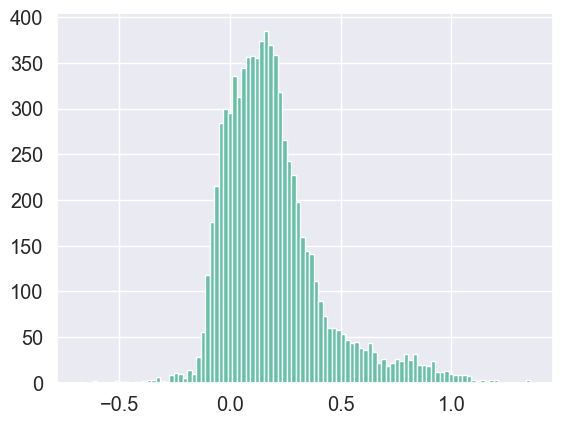

In [121]:
# Смотрим распределение
df['source_attractiveness'].hist(bins=100)

In [122]:
df.groupby(['category']).count()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
category,,,,,,,,,,
ecom,2452,2360,2336,2452,2452,2452,2284,2452,2452,2452
information_source,3934,3815,3759,3934,3934,3934,3722,3934,3934,3934
news,816,779,774,816,816,816,767,816,816,816
porn,383,370,362,383,383,383,360,383,383,383
social,415,403,393,415,415,415,394,415,415,415


In [123]:
# Подготавливаем данные

In [124]:
# Заметим, что первая колонка 	Unnamed: 0 (ничего не значит). Удалим её
# Удалим также столбец с датой регистрации
df = df.drop(['Unnamed: 0', 'date_of_registration'], axis = 1)
df.head()

,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness
0,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750
1,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317
2,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396
3,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360
4,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303


In [125]:
df.dtypes

category                  object
clicks                   float64
likes                    float64
buys                       int64
4xx_errors                 int64
5xx_errors                 int64
complaints_count          object
average_dwelltime        float64
source_attractiveness    float64
dtype: object

In [126]:
# Заметим, что колонка complaints_count имеет тип object, 
# но в нем должны храниться числовые значения
# преобразуем иные значения в NaN

df['complaints_count'] = pd.to_numeric(df['complaints_count'], errors='coerce')

df.dtypes


category                  object
clicks                   float64
likes                    float64
buys                       int64
4xx_errors                 int64
5xx_errors                 int64
complaints_count         float64
average_dwelltime        float64
source_attractiveness    float64
dtype: object

In [138]:
# Тупая очистка (Удалим все столбцы с NaN значениями )

# df = df.dropna()
df.shape


(8000, 9)

# Борьба с выбросами

In [168]:
cat = 'information_source'
col = 'clicks'

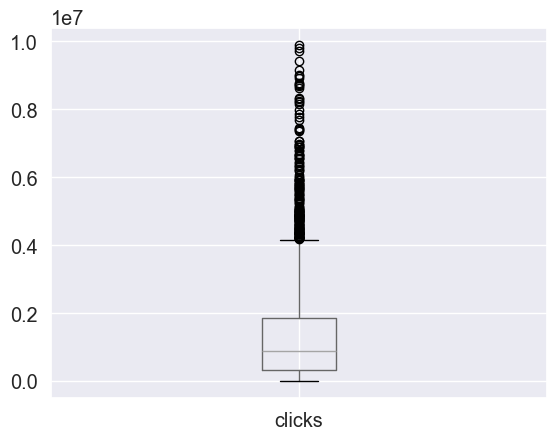

In [169]:
figure=df[df['category']==cat].dropna().boxplot(column=col)

<Axes: xlabel='clicks', ylabel='Density'>

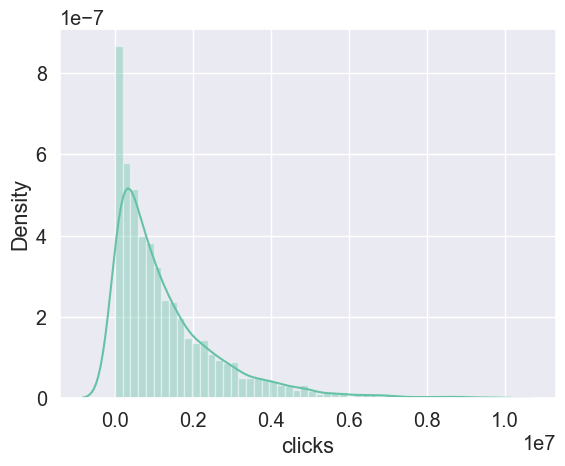

In [170]:
sns.distplot(df[df['category']==cat][col].dropna())

In [172]:
IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
lower_bound = df[col].quantile(0.25)-1.5*IQR
upper_bound = df[col].quantile(0.75)+1.5*IQR
print(lower_bound, upper_bound)
print(lower_bound, upper_bound)

-3473234.5 6748513.5
-3473234.5 6748513.5


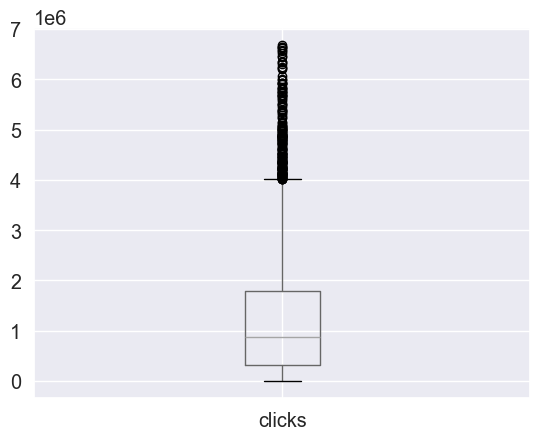

In [175]:
df = df[df[col] < upper_bound]

figure=df[df['category']==cat].dropna().boxplot(column=col)




# Разбивка на различные выборки

In [91]:
train, test = train_test_split(df, test_size=0.2, stratify=df['category'])

print(train.shape)
print(test.shape)

(5240, 9)
(1310, 9)


In [92]:
categorial_features = ['category']
print(categorial_features)
real_features = list(df.drop(columns=['category', 'source_attractiveness']).columns)
print(real_features)
target_feature = 'source_attractiveness'


['category']
['clicks', 'likes', 'buys', '4xx_errors', '5xx_errors', 'complaints_count', 'average_dwelltime']


In [93]:
import warnings
warnings.filterwarnings('ignore')

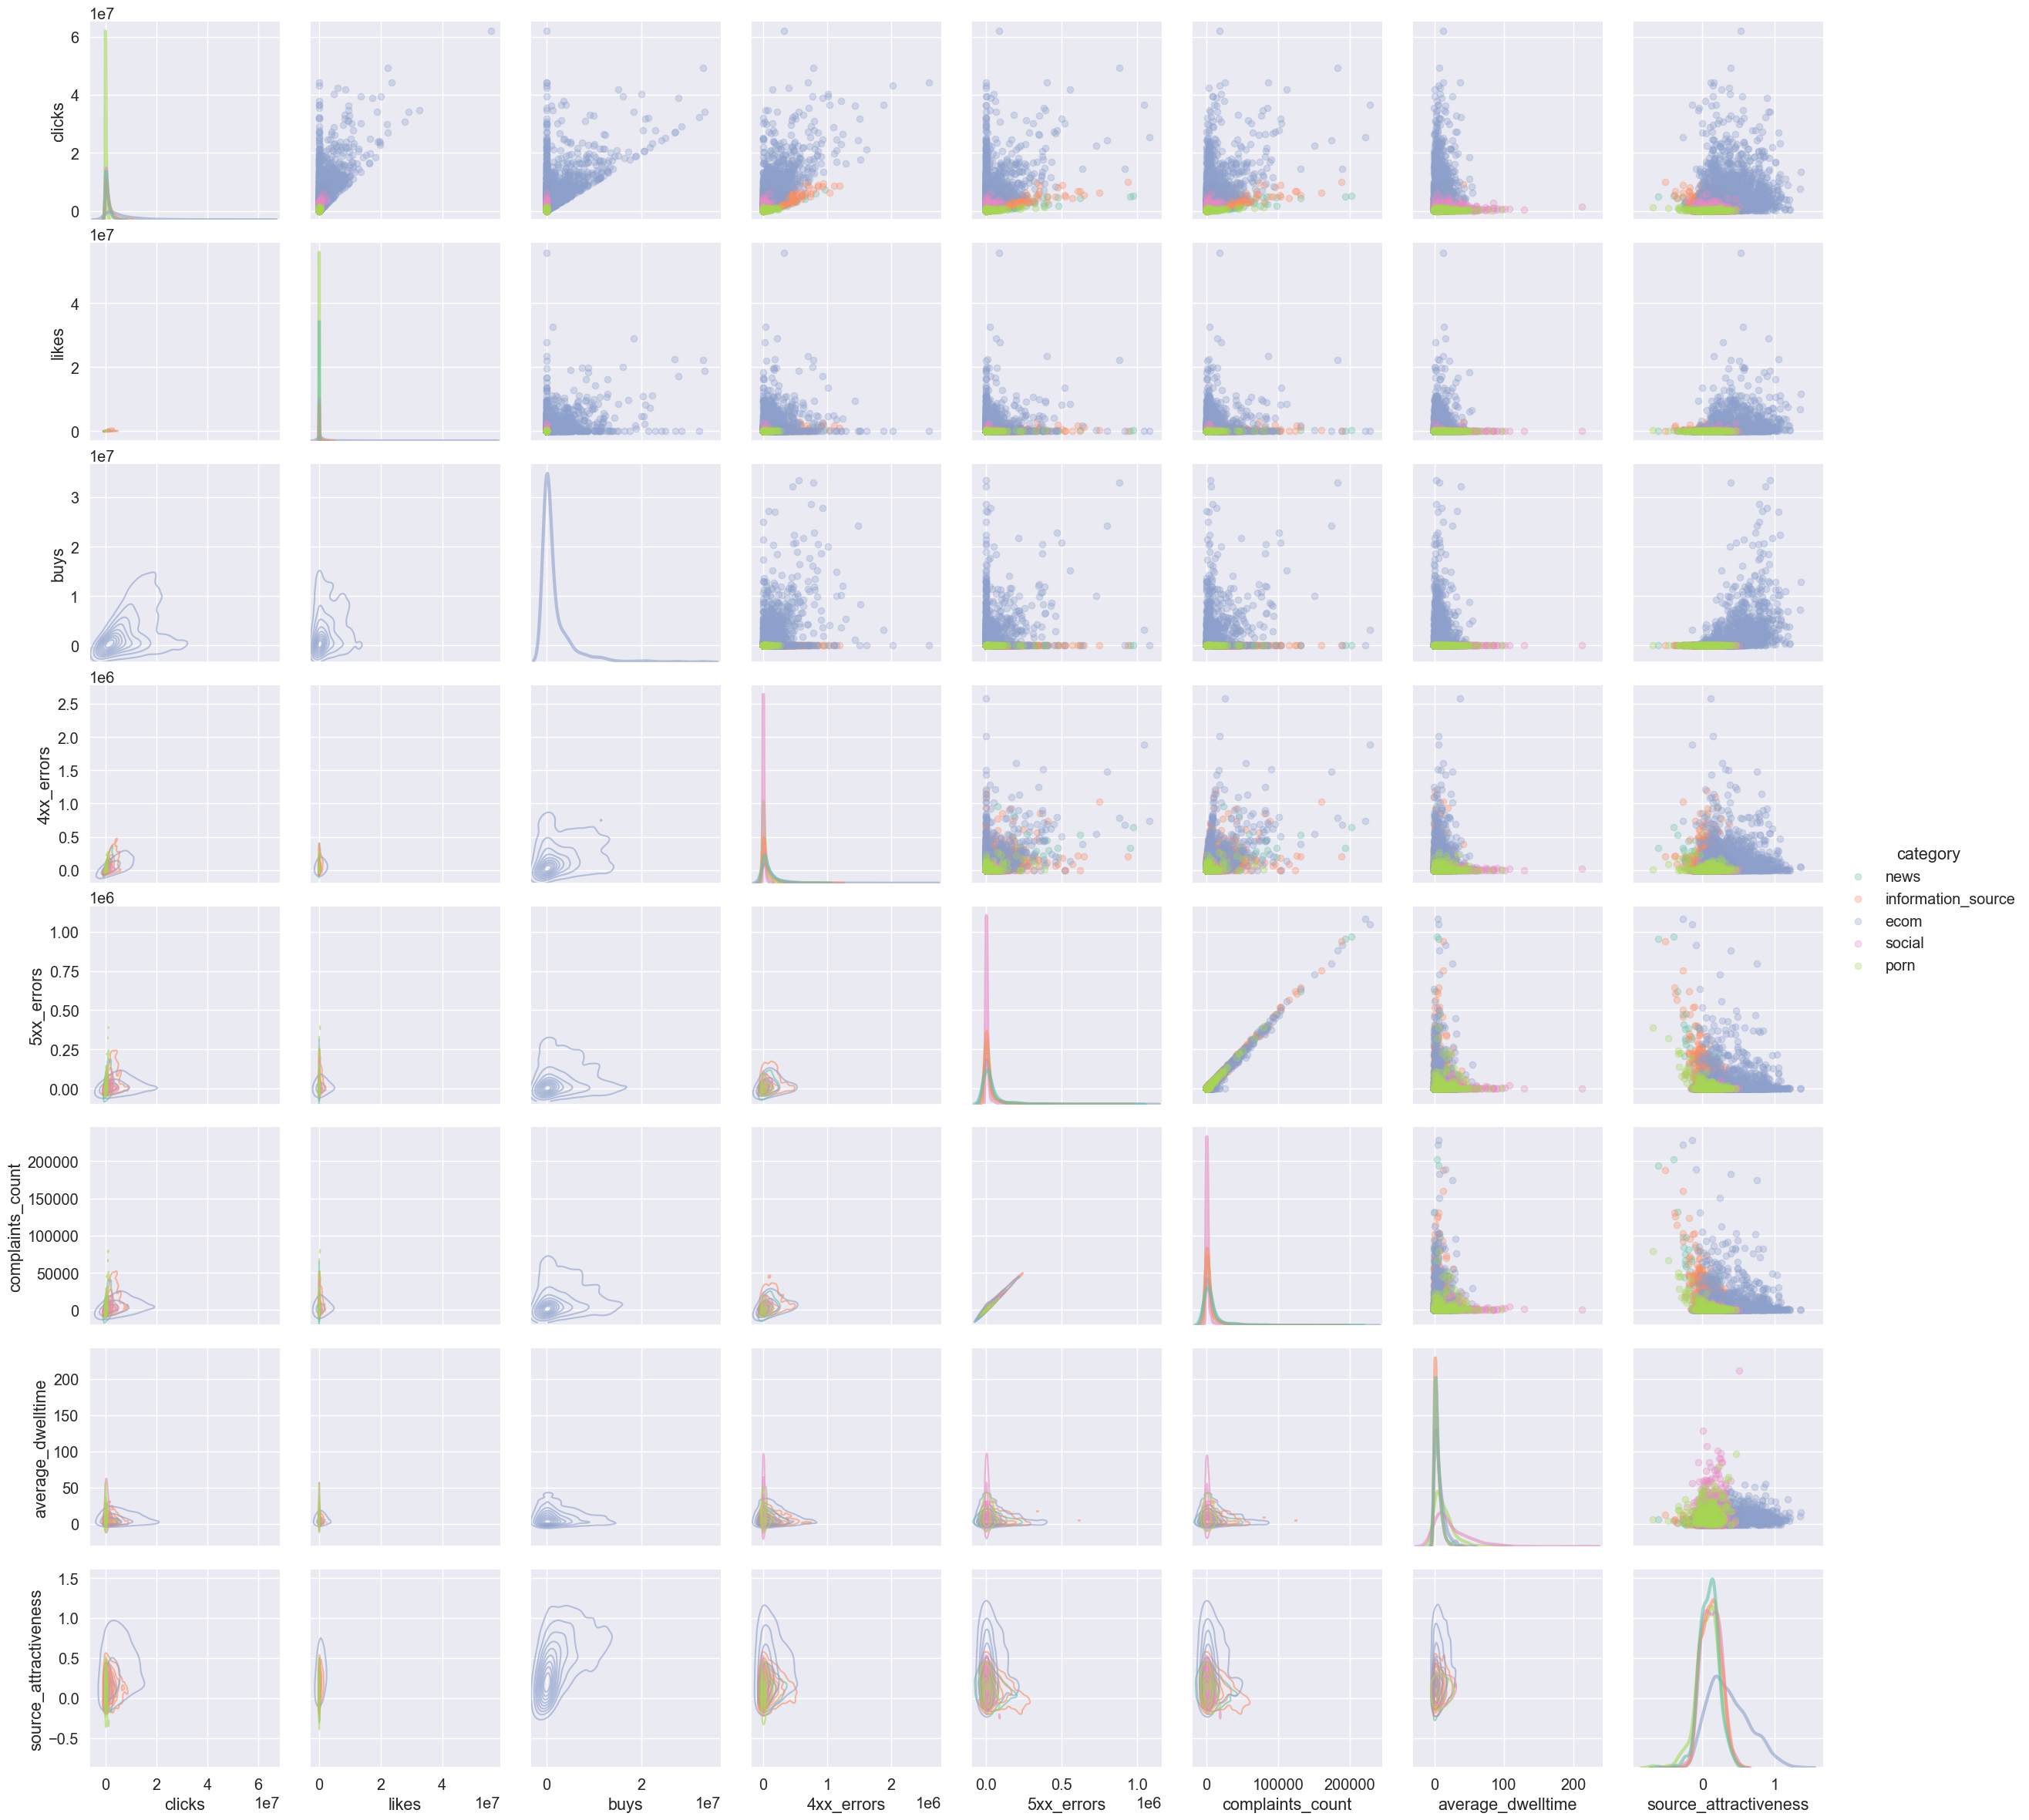

In [94]:
# for hue in categorial_features:
#     g = sns.PairGrid(train[[*(real_features + [target_feature]), hue]], hue=hue, diag_sharey=False, height=3)
#     g.map_lower(sns.kdeplot, alpha=0.6)
#     g.map_upper(plt.scatter, alpha=0.3)
#     g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
#     g.add_legend()

In [96]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [97]:
encoder.categories_

[array(['ecom', 'information_source', 'news', 'porn', 'social'],
       dtype=object)]

In [98]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape
# train[real_features].shape
# train_cat.shape

(5240, 11)

In [113]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])


LinearRegression()

In [114]:
model.coef_

array([-1.68759291e-08,  2.60888469e-08,  4.76159533e-08,  2.00262850e-07,
        9.69068715e-07, -7.47308371e-06,  1.74267763e-03, -1.93562381e-01,
       -2.23302785e-01, -2.69080755e-01, -2.34197200e-01])

In [101]:
model.intercept_

0.33333927826571985

In [102]:
# Тестирование и оценка качества

In [103]:
df.head()

test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])

In [104]:
test_preds = model.predict(X_test)

In [105]:
metrics.mean_squared_error(test[target_feature], test_preds, squared=False)

0.1673784443157038

In [106]:
metrics.mean_absolute_error(test[target_feature], test_preds)

0.12854383820113063

In [107]:
metrics.mean_absolute_percentage_error(test[target_feature], test_preds) * 100

599.0945428612796

In [108]:
metrics.r2_score(test[target_feature], test_preds)

0.4757040740690024

In [109]:
train_preds = model.predict(X_train)

metrics.mean_squared_error(train[target_feature], train_preds, squared=False), \
metrics.mean_absolute_error(train[target_feature], train_preds), \
metrics.mean_absolute_percentage_error(train[target_feature], train_preds) * 100

(0.16340616785918483, 0.12612790691453987, 427.7064295551851)

<Axes: >

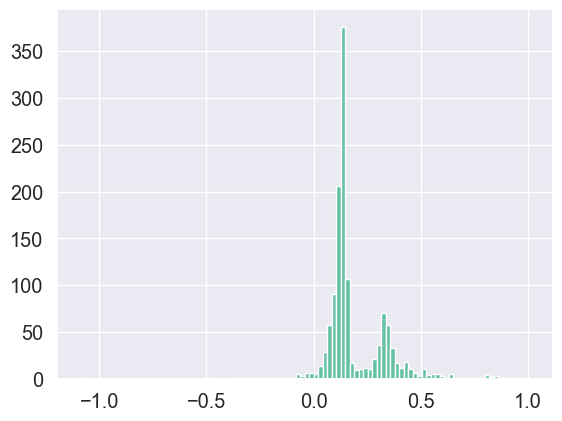

In [112]:
pred_df = pd.Series(test_preds)
pred_df.hist(bins=100)

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [ ]:
def predict(data_path):
    data = pd.read_csv(data_path)
    # Add your implementation
    predicts = 1#...
    with open('output.csv', 'w') as file:
        for predict in predicts:
            file.write(str(predict) + '\n')